Imports

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import eesr

# Functions

In [3]:
# Creates a dataframe with the results of the experiments based on the parameters.
def create_dataframe(path_ex, file_name, dcs = '', tpp = ''):
    select_dcs = "dcs_" + dcs
    select_tpp = "tpp_" + tpp
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (select_dcs in folder) & (select_tpp in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            if '.tsv' in file_name:
              data = pd.read_csv(file_path, delimiter='\t')
            else:
              data = pd.read_csv(file_path, delimiter=',')
            data['trace_name'] = folder
            df = pd.concat([df, data])

    return df

# Creates a dataframe with the environment stats of the specified file.
def create_env_dataframe(path_ex, trace_name):
    file_name = 'environment.csv'
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (trace_name in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            data = pd.read_csv(file_path)
            data['trace_name'] = folder
            df = pd.concat([df, data])
    df['timestamp'] = df['timestamp'] - df['timestamp'].min()
    return df

# Splits the environment dataframe into a dataframe for each environment and writes it to a csv file.
# def split_env_dataframe(df, path_ex):



# Variables

Experiment paths

In [4]:
path_ex1 = '../EX_1/'
path_ex2 = '../EX_2/'

colors = ['lightcoral', 'steelblue', 'yellowgreen']
colors2 = ['#F05039', '#E57A77', '#1F449C', '#3D65A5', '#7CA1CC', '#A8B6CC']

Datacentre dependent dataframes

In [5]:
stats_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='')
stats_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='')

summary_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='')
summary_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='')

tasks_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='')
tasks_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='')

workflows_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='')
workflows_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='')

In [6]:
summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Normalized Schedule Length']['mean'].value_counts()

1.00     170
2.16       2
12.23      1
13.80      1
16.24      1
16.87      1
Name: mean, dtype: int64

In [7]:
summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Schedule Length']

,metric,count,mean,std.dev,cv,geo.mean,harm.mean,min,p25,median,p75,p95,p99,max,trace_name
14,Workflow Schedule Length,20,95042.90,1574.65,26.09,95030.67,95018.61,93020.0,93889.25,94541.0,95497.25,99057.45,99100.0,99100.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
14,Workflow Schedule Length,20,95042.90,1574.65,26.09,95030.67,95018.61,93020.0,93889.25,94541.0,95497.25,99057.45,99100.0,99100.0,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
14,Workflow Schedule Length,20,81619.65,2344.22,67.33,81588.33,81557.67,78707.0,80031.00,80652.0,83432.25,87022.50,87042.0,87042.0,askalon-new_ee11_parquet_tpp_fastest_machine_d...
14,Workflow Schedule Length,20,81619.65,2344.22,67.33,81588.33,81557.67,78707.0,80031.00,80652.0,83432.25,87022.50,87042.0,87042.0,askalon-new_ee11_parquet_tpp_look_ahead_dcs_1
14,Workflow Schedule Length,21,107417.62,1250.12,14.55,107410.70,107403.79,104893.0,106535.00,107366.0,108189.50,109735.70,109746.0,109746.0,askalon-new_ee12_parquet_tpp_fastest_machine_d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Workflow Schedule Length,1,342609.00,0.00,0.00,342609.00,342609.00,342609.0,342609.00,342609.0,342609.00,342609.00,342609.0,342609.0,workflowhub_montage_ti01-971107n_degree-2-0_os...
14,Workflow Schedule Length,1,1229701.00,0.00,0.00,1229701.00,1229701.00,1229701.0,1229701.00,1229701.0,1229701.00,1229701.00,1229701.0,1229701.0,workflowhub_montage_ti01-971107n_degree-4-0_os...
14,Workflow Schedule Length,1,1229701.00,0.00,0.00,1229701.00,1229701.00,1229701.0,1229701.00,1229701.0,1229701.00,1229701.00,1229701.0,1229701.0,workflowhub_montage_ti01-971107n_degree-4-0_os...
14,Workflow Schedule Length,1,46924179.00,0.00,0.00,46924179.00,46924179.00,46924179.0,46924179.00,46924179.0,46924179.00,46924179.00,46924179.0,46924179.0,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


Fastest Machine Placement variables

In [8]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
stats_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='fastest_machine')

summary_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='fastest_machine')
summary_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='fastest_machine')

tasks_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='fastest_machine')
tasks_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='fastest_machine')

workflows_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='fastest_machine')
workflows_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='fastest_machine')

Look Ahead Placement variables

In [9]:
stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
stats_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='look_ahead')

summary_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='look_ahead')
summary_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='look_ahead')

tasks_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='look_ahead')
tasks_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='look_ahead')

workflows_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='look_ahead')
workflows_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='look_ahead')

# Exploration

In [10]:
stats_dc1_df[stats_dc1_df['trace_name'] == 'askalon-new_ee68_parquet_tpp_look_ahead_dcs_1']

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,1978356317,10785263,0.01,0.000009,askalon-new_ee68_parquet_tpp_look_ahead_dcs_1


In [11]:
stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.1]

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,5348902,2106293456,393.78,0.683647,spec_trace-1_parquet_tpp_fastest_machine_dcs_1
0,5348902,2106293456,393.78,0.683647,spec_trace-1_parquet_tpp_look_ahead_dcs_1
0,5403452,2325476523,430.37,0.747168,spec_trace-2_parquet_tpp_fastest_machine_dcs_1
0,5403452,2325476523,430.37,0.747168,spec_trace-2_parquet_tpp_look_ahead_dcs_1
0,338630,20009940,59.09,0.102588,workflowhub_epigenomics_dataset-ilmn_chameleon...
0,338630,20009940,59.09,0.102588,workflowhub_epigenomics_dataset-ilmn_chameleon...


In [12]:
stats_dc1_df.describe()

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage
count,1.760000e+02,1.760000e+02,176.000000,176.000000
mean,5.032061e+07,1.207853e+08,14.254773,0.024748
std,2.138286e+08,4.766883e+08,61.971333,0.107589
min,1.260320e+05,3.360170e+05,0.010000,0.000009
25%,4.880140e+06,4.275968e+06,0.592500,0.001030
50%,9.440690e+06,8.481290e+06,0.995000,0.001730
75%,2.034142e+07,1.593006e+07,2.232500,0.003879
max,1.978356e+09,2.977778e+09,430.370000,0.747168


<AxesSubplot: >

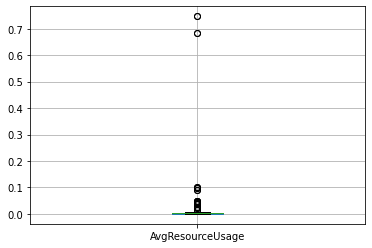

In [13]:
stats_dc1_df.boxplot(column=['AvgResourceUsage'])

In [14]:
stats_dc2_df[stats_dc2_df['AvgResourceUsage'] >= 0.03]

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,5348902,2106293456,393.78,0.341823,spec_trace-1_parquet_tpp_fastest_machine_dcs_2
0,5348902,2106293456,393.78,0.341823,spec_trace-1_parquet_tpp_look_ahead_dcs_2
0,5403452,2325476523,430.37,0.373584,spec_trace-2_parquet_tpp_fastest_machine_dcs_2
0,5403452,2325476523,430.37,0.373584,spec_trace-2_parquet_tpp_look_ahead_dcs_2
0,323753,17110105,52.85,0.045876,workflowhub_epigenomics_dataset-hep_chameleon-...
0,323753,17110105,52.85,0.045876,workflowhub_epigenomics_dataset-hep_chameleon-...
0,242303,13447697,55.50,0.048177,workflowhub_epigenomics_dataset-hep_grid5000_s...
0,242303,13447697,55.50,0.048177,workflowhub_epigenomics_dataset-hep_grid5000_s...
0,338630,20009940,59.09,0.051294,workflowhub_epigenomics_dataset-ilmn_chameleon...
0,338630,20009940,59.09,0.051294,workflowhub_epigenomics_dataset-ilmn_chameleon...


In [15]:
baseline_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'fastest_machine')
lookahead_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'look_ahead')

lookahead_performance_dc1

,task.id,workflow.id,time.submit,time.ready,time.start,time.minimal.starttime,time.complete,time.runtime.original,time.runtime.actual,energy.consumed,trace_name
0,0,0,2930096,2930096,2930096,2930096,2950077,13022,19981,0.011114,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
1,1,0,2948527,2948527,2948527,2948527,2968398,12950,19871,0.011053,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
2,2,0,2989836,2989836,2989836,2989836,2992324,1621,2488,0.001384,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
3,3,0,3010600,3010600,3010600,3010600,3012245,1645,1645,0.001606,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
4,4,0,2935120,2935120,2935120,2935120,2955072,13003,19952,0.011098,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
...,...,...,...,...,...,...,...,...,...,...,...
747,747,0,0,6004,6004,6004,6261,167,257,0.000143,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
748,748,0,0,233632,233632,233632,312080,78448,78448,0.076609,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
749,749,0,0,233426,233426,233426,321547,88121,88121,0.086056,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
750,750,0,0,67732,67732,67732,200317,132585,132585,0.129478,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


# Validation

In [16]:
print(tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].describe())
tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].describe()

count      88.000000
mean      117.954438
std       466.851651
min         0.328142
25%         4.175750
50%         8.282509
75%        15.556696
max      2907.986604
Name: energy.consumed, dtype: float64


count      88.000000
mean      115.518984
std       462.291324
min         0.320143
25%         3.725695
50%         7.285628
75%        13.659754
max      2886.460643
Name: energy.consumed, dtype: float64

-2.0647410489535067 %
Baseline:  10.379990526367186
Lookahead:  10.165670601091797


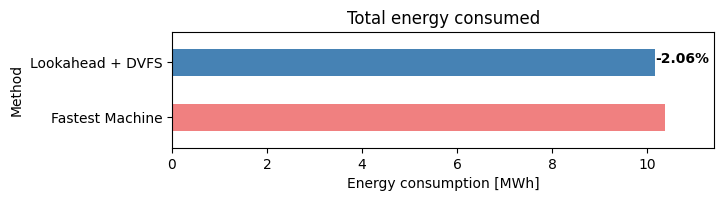

' \nTODO:\nincrease text size (figure text at least as big as text in caption)\naxes labels size of caption text\nincrease method and Energy consumption text size (125% of lah and baseline text size)\nTask energy consumption for one datacentre (150% or more of caption text size, but this will be the actual caption in the paper)\n\nDecrease the size of the bars (vertically) (2x size of text in method type)\n'

In [17]:
bl = tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].sum()/1000
nl = tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].sum()/1000

difference_percentage = (nl - bl) / bl * 100
print(difference_percentage, '%')
print('Baseline: ', bl)
print('Lookahead: ', nl)


bar_height = 0.5
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.barh('Fastest Machine', bl, color=colors[0], height=bar_height)
ax.barh('Lookahead + DVFS', nl, color=colors[1], height=bar_height)
ax.set_xlabel('Energy consumption [MWh]')
ax.set_ylabel('Method')
ax.margins(x=0.1, y=0.2)
ax.text(nl, 1, str(round(difference_percentage, 2))+'%', color='black', fontweight='bold')
plt.savefig('./figures/PNG/validation_total_energy_consumed.png', bbox_inches='tight', dpi=300)
ax.set_title('Total energy consumed')
plt.show()

''' 
TODO:
increase text size (figure text at least as big as text in caption)
axes labels size of caption text
increase method and Energy consumption text size (125% of lah and baseline text size)
Task energy consumption for one datacentre (150% or more of caption text size, but this will be the actual caption in the paper)

Decrease the size of the bars (vertically) (2x size of text in method type)
'''

In [18]:
# workflow_delays[ttp][dvfs_enabled][domain].extend(workflow_df['time.complete'] - workflow_df['time.earliest.complete'])
workflows_dc1_fmp_df['workflow_delays'] = workflows_dc1_fmp_df['time.complete'] - workflows_dc1_fmp_df['time.earliest.complete']
workflows_dc1_lah_df['workflow_delays'] = workflows_dc1_lah_df['time.complete'] - workflows_dc1_lah_df['time.earliest.complete']

9.39775557194513 %
Baseline:  178.8161325
Lookahead:  195.62083555555554


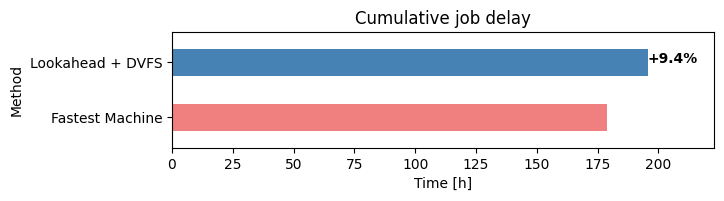

In [19]:
# calculate cumulative workflow delays
total_delay_fmp = workflows_dc1_fmp_df['workflow_delays'].sum()/1000/60/60
total_delay_lah = workflows_dc1_lah_df['workflow_delays'].sum()/1000/60/60

# calculate the percentage of delay
delay_percentage = (total_delay_lah - total_delay_fmp) / total_delay_fmp * 100
print(delay_percentage, '%')
print('Baseline: ', total_delay_fmp)
print('Lookahead: ', total_delay_lah)


bar_height = 0.5
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.barh('Fastest Machine', total_delay_fmp, color=colors[0], height=bar_height)
ax.barh('Lookahead + DVFS', total_delay_lah, color=colors[1], height=bar_height)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Method')
ax.margins(x=0.14, y=0.2)
ax.text(total_delay_lah, 1, '+'+str(round(delay_percentage, 2))+'%', color='black', fontweight='bold')
plt.savefig('./figures/PNG/validation_cumulative_job_delay.png', bbox_inches='tight', dpi=300)
ax.set_title('Cumulative job delay')
plt.show()

Notes:
Also show workflow Slowdown (box and whisker plot + violin plot) (workflow normalized schedule length)

# Experiment 1

**Process**:
1. Select from the 1 DC runs:
    * a) one representative trace for each target utilization in increments of 10%
    * b) one trace with average, shortest and longest running times
2. Compute utilization graphs for 
    * a) fastest machine placement (fmp)
    * b) lookahead (lah) placement
    * c) compare fmp in 1 DC vs 2 DC
    * d) compare lah in 1 DC vs 2 DC
3. Calculate total energy consumption (including idle consumption) for each trace
4. Select the corresponding traces from the 2 DC runs
5. Run the DCs in different country configurations and show the results from EESR

## 1.a)

In [20]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
utilization_candidates_fmp = stats_dc1_fmp_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]

stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
utilization_candidates_lah = stats_dc1_lah_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]

## 1.b)

In [21]:
duration_stats = stats_dc1_fmp_df['TraceDuration'].describe()

max_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] == duration_stats['max']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]
median_high_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] <= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=False)['trace_name'].values[0]
median_low_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] >= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=True)['trace_name'].values[0]
sorted_df = stats_dc1_fmp_df.sort_values(by=['TraceDuration'], ascending=True)
min_duration_trace = sorted_df[sorted_df['TraceDuration'] > 900_000]['trace_name'].head(1).values[0]
print(min_duration_trace)
duration_candidates_fmp = pd.DataFrame({'trace_name': [max_duration_trace, median_high_duration_trace, median_low_duration_trace, min_duration_trace],
                                    'duration': ['max', 'median-high', 'median-low', 'min']})



duration_stats = stats_dc1_lah_df['TraceDuration'].describe()

max_duration_trace = stats_dc1_lah_df[stats_dc1_lah_df['TraceDuration'] == duration_stats['max']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]
median_high_duration_trace = stats_dc1_lah_df[stats_dc1_lah_df['TraceDuration'] <= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=False)['trace_name'].values[0]
median_low_duration_trace = stats_dc1_lah_df[stats_dc1_lah_df['TraceDuration'] >= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=True)['trace_name'].values[0]
# min_duration_trace = stats_dc1_lah_df[stats_dc1_lah_df['TraceDuration'] == duration_stats['min']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]
sorted_df = stats_dc1_lah_df.sort_values(by=['TraceDuration'], ascending=True)
min_duration_trace = sorted_df[sorted_df['TraceDuration'] > 1_800_000]['trace_name'].values[0]
print(min_duration_trace)
duration_candidates_lah = pd.DataFrame({'trace_name': [max_duration_trace, median_high_duration_trace, median_low_duration_trace, min_duration_trace],
                                    'duration': ['max', 'median-high', 'median-low', 'min']})

workflowhub_montage_dataset-02_degree-4-0_osg_schema-0-2_montage-4-0-osg-run009_parquet_tpp_fastest_machine_dcs_1
Pegasus_P4_parquet_tpp_look_ahead_dcs_1


## 2.a),b)

In [22]:
num_machines = 9
TDP = 225
idleTDP = 100
timeframe = 0.25 # 15 minutes

def get_energy_consumption(num_machines, timeframe, idleTDP, TDP):
    total_TDP = TDP * num_machines   # total TDP of all machines
    total_idleTDP = idleTDP * num_machines   # total idle TDP of all machines
    theoretical_max = total_TDP * timeframe * 3600   # Total TDP for 15 minutes converted to Joules
    theoretical_min = total_idleTDP * timeframe * 3600
    theoretical_min_dvfs = theoretical_min * (1 - 0.126) # maximum DVFS reduction
    return theoretical_max, theoretical_min, theoretical_min_dvfs


Plotting functions

In [23]:
MAX_NUM_OF_GRAPHS = 4

conversion_factor = 1_000_000
conversion_name = 'M'

theoretical_max, theoretical_min, theoretical_min_dvfs = get_energy_consumption(num_machines, timeframe, idleTDP, TDP)
theoretical_max = theoretical_max / conversion_factor
theoretical_min = theoretical_min / conversion_factor
theoretical_min_dvfs = theoretical_min_dvfs / conversion_factor

top_limit = 2000000
top_limit = top_limit / conversion_factor


def draw_day_lines(df, ax):
    num_lines = int(df['timestamp'].max() // 24) + 1
    for i in range(num_lines):
        ax.axvline(x=i*24, color = 'black')

def plot_energy_consumption(df_fmp, df_lah, theoretical_max, theoretical_min, theoretical_min_dvfs, max_graphs):
    graph_counter = 0
    for i in range(len(df_fmp)):
        if max_graphs > 0:
            if graph_counter > max_graphs:
                break
        
        fmp_name = df_fmp.iloc[i]['trace_name']
        lah_name = df_lah.iloc[i]['trace_name']

        fmp_env = create_env_dataframe(path_ex1, fmp_name)
        lah_env = create_env_dataframe(path_ex1, lah_name)
        top_limit = 2000000

        # convert to kJ
        fmp_env['it_power_total'] = fmp_env['it_power_total'] / conversion_factor
        lah_env['it_power_total'] = lah_env['it_power_total'] / conversion_factor
        top_limit = top_limit / conversion_factor

        # convert to hours
        fmp_env['timestamp'] = fmp_env['timestamp'] / 1000 / 60 / 60
        lah_env['timestamp'] = lah_env['timestamp'] / 1000 / 60 / 60


        # plot fmp and lah it power total
        if len(fmp_env) > 2:
            fig, ax = plt.subplots(figsize=(10, 5))

            ax.plot(lah_env['timestamp'], fmp_env['it_power_total'], 'o', ls='-', ms=10, color=colors[0], label='FMP', linewidth=2.5, markevery=0.1)
            ax.plot(lah_env['timestamp'], lah_env['it_power_total'], 'v', ls='-', ms=10, color=colors[1], label='LAH', linewidth=2.5, markevery=0.3)

            # fill between with blue where fmp is higher than lah and yellow where lah is higher than fmp
            plt.fill_between(lah_env['timestamp'], lah_env['it_power_total'], fmp_env['it_power_total'], where=fmp_env['it_power_total'] >= lah_env['it_power_total'],
                              facecolor='yellow', alpha=0.3)
            plt.fill_between(lah_env['timestamp'], lah_env['it_power_total'], fmp_env['it_power_total'], where=fmp_env['it_power_total'] <= lah_env['it_power_total'], 
                              facecolor='cyan', alpha=0.3)
            
            text_x_coord = lah_env['timestamp'].max()
            ax.axhline(y=theoretical_max, color='red', linestyle=':', linewidth=2)
            ax.text(text_x_coord-0.08*text_x_coord, theoretical_max-0.07, f'Max = {round(theoretical_max, 2)}', color='black', fontweight='bold')

            ax.axhline(y=theoretical_min, color='green', linestyle=':', linewidth=2)
            ax.text(text_x_coord-0.08*text_x_coord, theoretical_min-0.07, f'Idle = {round(theoretical_min, 2)}', color='black', fontweight='bold')        
            
            ax.axhline(y=theoretical_min_dvfs, color='blue', linestyle=':', linewidth=2)
            ax.text(text_x_coord-0.2*text_x_coord, theoretical_min_dvfs-0.07, f'Idle with DVFS = {round(theoretical_min_dvfs, 2)}', color='black', fontweight='bold')

            plt.fill_between(lah_env['timestamp'], 0, theoretical_min_dvfs, facecolor='black', alpha=0.3)
            plt.fill_between(lah_env['timestamp'], theoretical_max, top_limit, facecolor='red', alpha=0.6)
            
            draw_day_lines(lah_env, ax)

            ax.grid(True)

            ax.set_xlabel('Time [h]')
            ax.set_ylabel(f'Energy [{conversion_name}J]')
            
            ax.set_ylim(0, top_limit)

            ax.legend()

            plt.savefig(f'./figures/PNG/energy_consumption_{fmp_name}.png', dpi=300)

            ax.set_title('Energy consumption for trace: ' + fmp_name
                          + '\nAverage Resource Usage: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
            plt.show()
            
            graph_counter += 1
        else:
            print('trace too short: ', fmp_name, ' ', len(fmp_env))


### Performance

In [24]:
dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='fastest_machine')
dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='look_ahead')

{'bodies': [<matplotlib.collections.PolyCollection at 0x17bdf433010>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17bdf433160>,
 'cmins': <matplotlib.collections.LineCollection at 0x17bdf4689d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x17bdf468d30>}

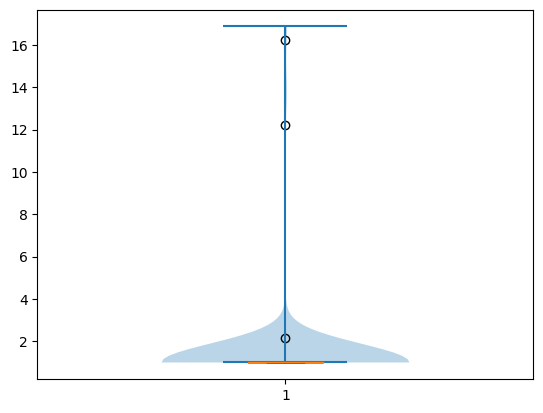

In [80]:
test = dc1_fmp_df[dc1_fmp_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']].groupby('trace_name').head()
test['mean'] = test['mean'].astype(float)
plt.boxplot(test['mean'])

test1 = dc1_lah_df[dc1_lah_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']].groupby('trace_name').head()
test1['mean'] = test1['mean'].astype(float)
plt.violinplot(test1['mean'])

In [25]:
dc1_fmp_df

,metric,count,mean,std.dev,cv,geo.mean,harm.mean,min,p25,median,p75,p95,p99,max,trace_name
0,Task Run Time,580,7319.33,5695.70,4432.24,4732.83,2969.13,837.0,1713.25,4920.00,13072.75,13736.95,18168.92,19883.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
1,Task Wait Time,580,0.00,0.00,NaN,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
2,Task Response Time,580,7319.33,5695.70,4432.24,4732.83,2969.13,837.0,1713.25,4920.00,13072.75,13736.95,18168.92,19883.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
3,Task Bounded Slowdown (1e0 Ticks),580,1.00,0.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
4,Task Bounded Slowdown (1e1 Ticks),580,1.00,0.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,askalon-new_ee10_parquet_tpp_fastest_machine_d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Task Bounded Slowdown (1e8 Ticks),752,1.00,0.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
12,Task Bounded Slowdown (1e9 Ticks),752,1.00,0.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
13,Task Energy Consumption,752,0.13,1.66,20.32,0.03,0.00,0.0,0.03,0.08,0.08,0.13,0.68,45.4,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
14,Workflow Schedule Length,1,46924179.00,0.00,0.00,46924179.00,46924179.00,46924179.0,46924179.00,46924179.00,46924179.00,46924179.00,46924179.00,46924179.0,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


In [43]:
fmp_traces_util = ['spec_trace-2_parquet_tpp_fastest_machine_dcs_1', 
              'spec_trace-1_parquet_tpp_fastest_machine_dcs_1', 
              'Pegasus_P3_parquet_tpp_fastest_machine_dcs_1', 
              'Pegasus_P7_parquet_tpp_fastest_machine_dcs_1', 
              'Pegasus_P5_parquet_tpp_fastest_machine_dcs_1']

fmp_traces_dur = ['askalon-new_ee68_parquet_tpp_fastest_machine_dcs_1',
                  'askalon-new_ee65_parquet_tpp_fastest_machine_dcs_1',
                  'askalon-new_ee69_parquet_tpp_fastest_machine_dcs_1']

lah_traces_util = ['spec_trace-2_parquet_tpp_look_ahead_dcs_1',
              'spec_trace-1_parquet_tpp_look_ahead_dcs_1',
              'Pegasus_P3_parquet_tpp_look_ahead_dcs_1',
              'Pegasus_P7_parquet_tpp_look_ahead_dcs_1',
              'Pegasus_P5_parquet_tpp_look_ahead_dcs_1']

lah_traces_dur = ['askalon-new_ee68_parquet_tpp_look_ahead_dcs_1',
                  'askalon-new_ee65_parquet_tpp_look_ahead_dcs_1',
                  'askalon-new_ee69_parquet_tpp_look_ahead_dcs_1']

In [57]:
wa = summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(fmp_traces_util)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                     trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length &   Pegasus\_P3\_parquet\_tpp\_fastest\_machine\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P5\_parquet\_tpp\_fastest\_machine\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P7\_parquet\_tpp\_fastest\_machine\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length & spec\_trace-1\_parquet\_tpp\_fastest\_machine\_dcs\_1 & 12.23 \\
Workflow Normalized Schedule Length & spec\_trace-2\_parquet\_tpp\_fastest\_machine\_dcs\_1 & 16.24 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\3319841174.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(fmp_traces_util)].to_latex(index=False))


In [58]:
wa = summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(fmp_traces_dur)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                         trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length & askalon-new\_ee65\_parquet\_tpp\_fastest\_machine\_dcs\_1 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee68\_parquet\_tpp\_fastest\_machine\_dcs\_1 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee69\_parquet\_tpp\_fastest\_machine\_dcs\_1 &   1.0 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\2375164079.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(fmp_traces_dur)].to_latex(index=False))


In [59]:
wa = summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(lah_traces_util)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length &   Pegasus\_P3\_parquet\_tpp\_look\_ahead\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P5\_parquet\_tpp\_look\_ahead\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P7\_parquet\_tpp\_look\_ahead\_dcs\_1 &  1.00 \\
Workflow Normalized Schedule Length & spec\_trace-1\_parquet\_tpp\_look\_ahead\_dcs\_1 & 13.80 \\
Workflow Normalized Schedule Length & spec\_trace-2\_parquet\_tpp\_look\_ahead\_dcs\_1 & 16.87 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\4159622662.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(lah_traces_util)].to_latex(index=False))


In [56]:
wa = summary_dc1_df[summary_dc1_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(lah_traces_dur)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                    trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length & askalon-new\_ee65\_parquet\_tpp\_look\_ahead\_dcs\_1 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee68\_parquet\_tpp\_look\_ahead\_dcs\_1 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee69\_parquet\_tpp\_look\_ahead\_dcs\_1 &   1.0 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\3163849171.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(lah_traces_dur)].to_latex(index=False))


### Utilization candidates

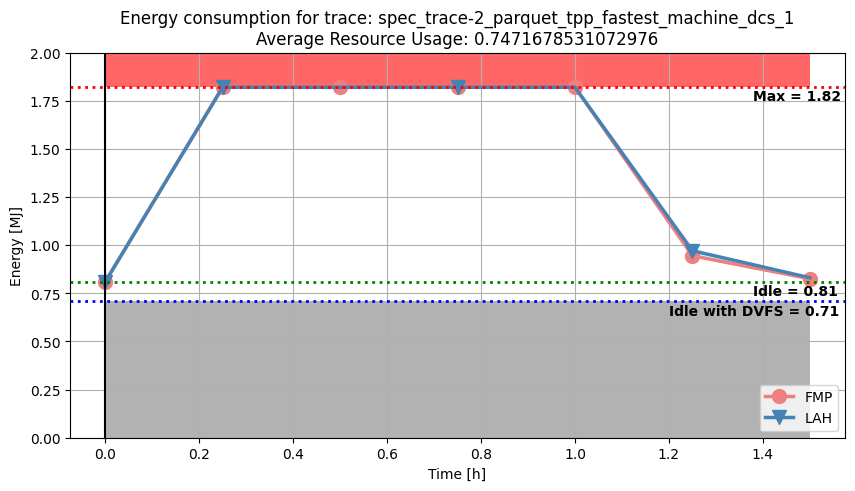

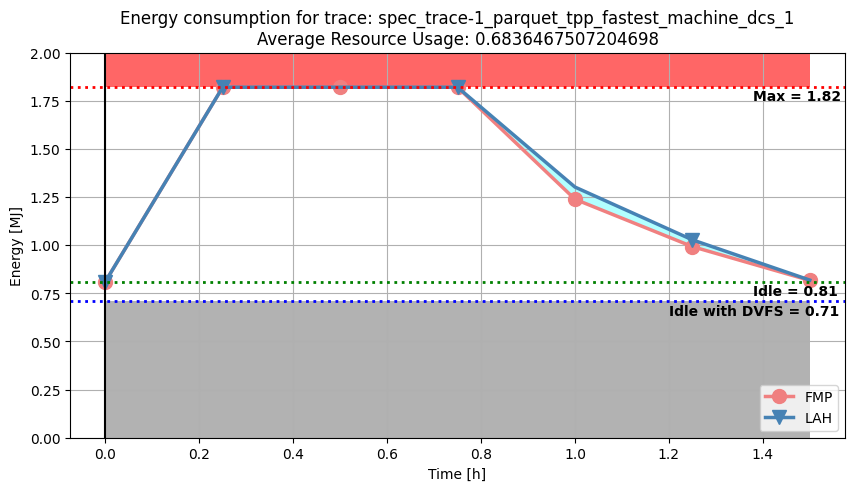

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


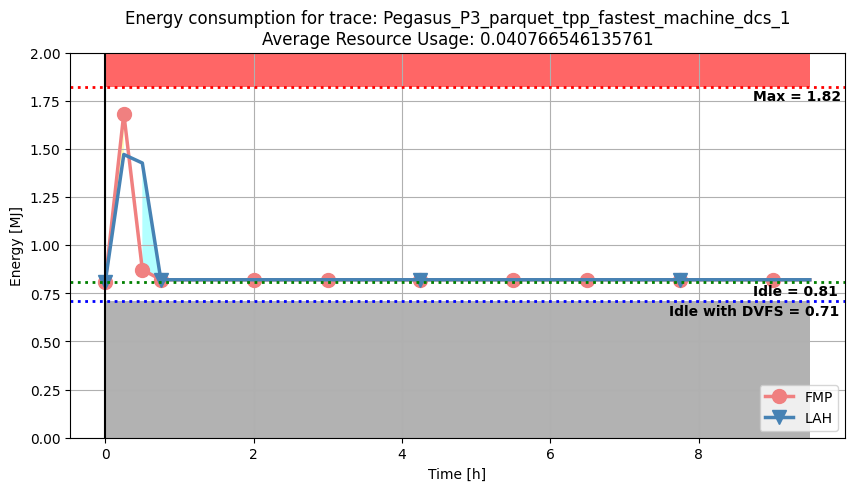

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


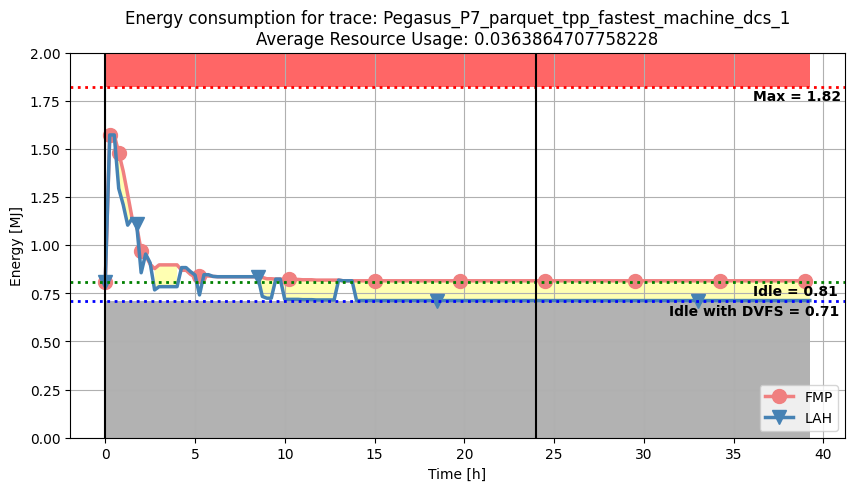

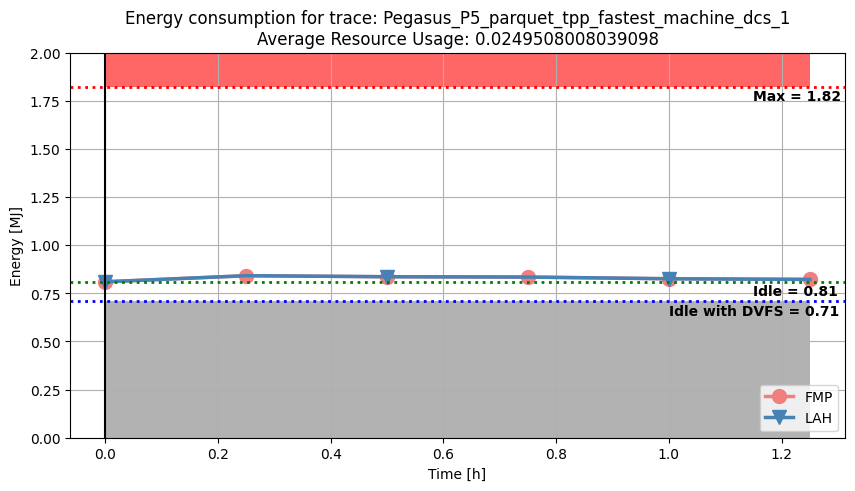

' \nfor traces that show no movement for a long time, truncate them (specify in the thesis)\n---\nadd labels to important points (ex: 1.82)\n'

In [23]:
plot_energy_consumption(utilization_candidates_fmp, utilization_candidates_lah, theoretical_max, theoretical_min, theoretical_min_dvfs, MAX_NUM_OF_GRAPHS)
''' 
for traces that show no movement for a long time, truncate them (specify in the thesis)
---
add labels to important points (ex: 1.82)
'''

### Duration candidates

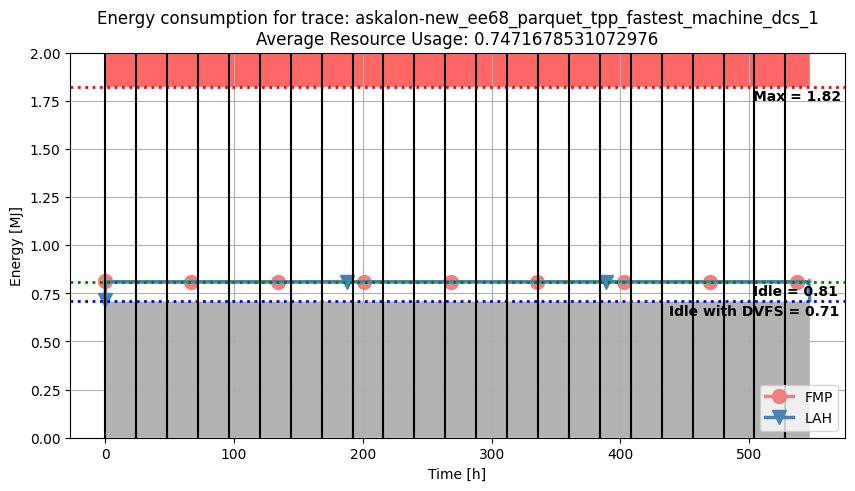

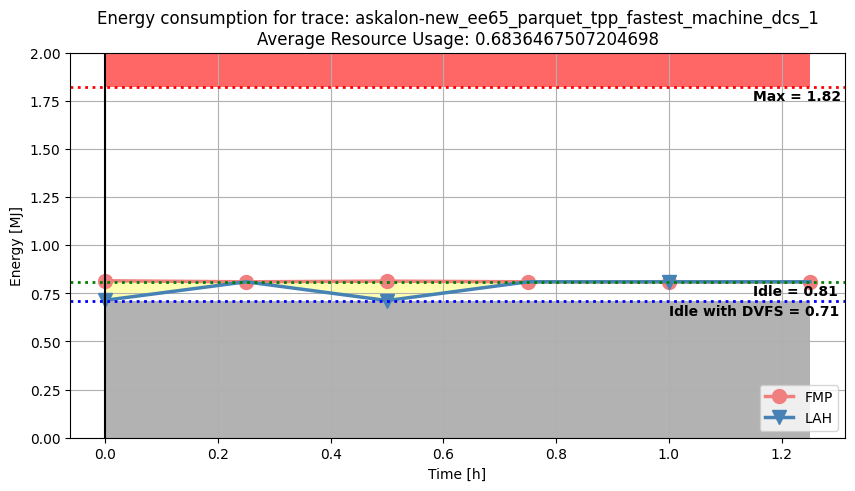

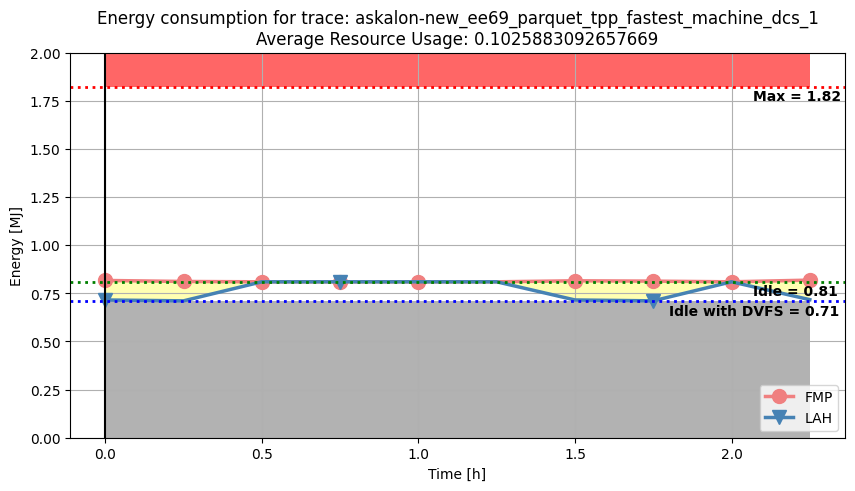

trace too short:  workflowhub_montage_dataset-02_degree-4-0_osg_schema-0-2_montage-4-0-osg-run009_parquet_tpp_fastest_machine_dcs_1   2


In [24]:
plot_energy_consumption(duration_candidates_fmp, duration_candidates_lah, theoretical_max, theoretical_min, theoretical_min_dvfs, MAX_NUM_OF_GRAPHS)

## 2.c)

Plotting functions

In [25]:

def plot_vs_graphs(candidates, theoretical_max, theoretical_min, max_graphs, placement_policy):
    vs_graph_counter = 0
    
    for i in range(len(candidates)):
        if max_graphs > 0:
            if vs_graph_counter > max_graphs:
                break
        dc_1 = candidates.iloc[i]['trace_name']
        dc_2 = candidates.iloc[i]['trace_name'][:-1] + '2'
        
        env_dc_1 = create_env_dataframe(path_ex1, dc_1)
        env_dc_2 = create_env_dataframe(path_ex1, dc_2)

        env_dc_1['it_power_total'] = env_dc_1['it_power_total'] / conversion_factor
        env_dc_2['it_power_total'] = env_dc_2['it_power_total'] / conversion_factor

        env_dc_1['timestamp'] = env_dc_1['timestamp'] / 1000 / 60 / 60
        env_dc_2['timestamp'] = env_dc_2['timestamp'] / 1000 / 60 / 60

        # fmp_env['it_power_total']

        # plot fmp and lah it power total
        if len(env_dc_1) > 2:
            fig, (ax, ax1) = plt.subplots(1, 2, figsize=(17, 5))

            # ax.plot(lah_env['timestamp'], lah_env['it_power_total'], 'v', ls='--', ms=6, color=colors[1], label='LAH', linewidth=2, markevery=0.3)

            ax.plot(env_dc_1['timestamp'], env_dc_1['it_power_total'], 'o', ls='-', ms=10, color=colors2[0], label=f'{placement_policy} 1 DC', linewidth=2, markevery=0.1)
            ax.plot(env_dc_2[env_dc_2['host_id'] == '0-0']['timestamp'], env_dc_2[env_dc_2['host_id'] == '0-0']['it_power_total'], 'v', ls='-', ms=10, color = colors2[2], label=f'{placement_policy} 2 DC, 1', linewidth=2, markevery=0.15)
            ax.plot(env_dc_2[env_dc_2['host_id'] == '1-1']['timestamp'], env_dc_2[env_dc_2['host_id'] == '1-1']['it_power_total'], '^', ls='-', ms=10, color = colors2[4], label=f'{placement_policy} 2 DC, 2', linewidth=2, markevery=0.2)

            text_x_coord = max(env_dc_2['timestamp'].max(), env_dc_1['timestamp'].max())
            ax.axhline(y=theoretical_max, color='red', linestyle=':', linewidth=2)
            ax.text(text_x_coord-0.12*text_x_coord, theoretical_max-0.07, f'Max = {round(theoretical_max, 2)}', color='black', fontweight='bold')

            ax.axhline(y=theoretical_min, color='green', linestyle=':', linewidth=2)
            ax.text(text_x_coord-0.12*text_x_coord, theoretical_min-0.07, f'Idle = {round(theoretical_min, 2)}', color='black', fontweight='bold')        
            
            # ax.axhline(y=theoretical_min_dvfs, color='blue', linestyle=':', linewidth=2)
            # ax.text(text_x_coord-0.27*text_x_coord, theoretical_min_dvfs-0.07, f'Idle with DVFS = {round(theoretical_min_dvfs, 2)}', color='black', fontweight='bold')

            if env_dc_1['timestamp'].max() < env_dc_2['timestamp'].max():
                ax.fill_between(env_dc_2['timestamp'], 0, theoretical_min, facecolor='black', alpha=0.3)
                ax.fill_between(env_dc_2['timestamp'], theoretical_max, top_limit, facecolor='red', alpha=0.6)
            else:
                ax.fill_between(env_dc_1['timestamp'], 0, theoretical_min, facecolor='black', alpha=0.3)
                ax.fill_between(env_dc_1['timestamp'], theoretical_max, top_limit, facecolor='red', alpha=0.6)

            # compute cumsums
            env_dc_1['cumsum'] = env_dc_1['it_power_total'].cumsum()
            env_dc_2['cumsum'] = env_dc_2['it_power_total'].cumsum()
            env_dc_2['cumsum_1'] = env_dc_2[env_dc_2['host_id'] == '0-0']['it_power_total'].cumsum()
            env_dc_2['cumsum_2'] = env_dc_2[env_dc_2['host_id'] == '1-1']['it_power_total'].cumsum()

            # set relative cumsums
            env_dc_1['relative_cumsum'] = 100  
            env_dc_2['relative_cumsum'] = 0
            env_dc_2['relative_cumsum_1'] = 0
            env_dc_2['relative_cumsum_2'] = 0
            
            # compute relative cumsums
            for time in env_dc_1['timestamp'].unique():
                env_dc_2.loc[env_dc_2['timestamp'] == time, 'relative_cumsum'] = \
                                  env_dc_2.loc[env_dc_2['timestamp'] == time, 'cumsum'] * 100 / env_dc_1.loc[env_dc_1['timestamp'] == time, 'cumsum'].values[0]
                env_dc_2.loc[env_dc_2['timestamp'] == time, 'relative_cumsum_1'] = \
                                  env_dc_2.loc[env_dc_2['timestamp'] == time, 'cumsum_1'] * 100 / env_dc_1.loc[env_dc_1['timestamp'] == time, 'cumsum'].values[0]
                env_dc_2.loc[env_dc_2['timestamp'] == time, 'relative_cumsum_2'] = \
                                  env_dc_2.loc[env_dc_2['timestamp'] == time, 'cumsum_2'] * 100 / env_dc_1.loc[env_dc_1['timestamp'] == time, 'cumsum'].values[0]
            
            # plot relative cumsums
            ax1.plot(env_dc_1['timestamp'], env_dc_1['relative_cumsum'], 'o', ls='-', ms=10, color=colors2[0], label=f'{placement_policy} 1 DC', linewidth=2, markevery=0.1)
            ax1.plot(env_dc_2['timestamp'].iloc[1::2], env_dc_2['relative_cumsum'].iloc[1::2], 's', ls='-', ms=10, color=colors2[1], label=f'{placement_policy} 2 DC sum', linewidth=2, markevery=0.15)
            ax1.plot(env_dc_2[env_dc_2['host_id'] == '0-0']['timestamp'], env_dc_2[env_dc_2['host_id'] == '0-0']['relative_cumsum_1'], 
                    'v', ls='-', ms=10, color=colors2[2], label=f'{placement_policy} 2 DC, 1', linewidth=2, markevery=0.2)
            ax1.plot(env_dc_2[env_dc_2['host_id'] == '1-1']['timestamp'], env_dc_2[env_dc_2['host_id'] == '1-1']['relative_cumsum_2'], 
                    '^', ls='-', ms=10, color=colors2[4], label=f'{placement_policy} 2 DC, 2', linewidth=2, markevery=0.25)
            
            draw_day_lines(env_dc_1, ax)
            draw_day_lines(env_dc_1, ax1)

            ax.legend()
            ax.grid(True)
            ax.set_ylim(0, top_limit)
            ax.set_title('Lineplot')
            ax.set_xlabel('Time [hours]')
            ax.set_ylabel(f'Energy [{conversion_name}J]')

            ax1.legend()
            ax1.grid(True)
            ax1.set_ylim(0)
            ax1.set_title('Cumulative Energy Relative to 1 DC')
            ax1.set_xlabel('Time [hours]')
            ax1.set_ylabel(f'Percentage [%]')

            plt.savefig(f'./figures/PNG/energy_comparison_{dc_1}_{placement_policy}_1DC_vs_2DC.png', bbox_inches='tight', dpi=300)
            fig.suptitle('Energy consumption comparison 1 DC vs 2 DCs for trace ' + dc_1)
            plt.show()
            
            vs_graph_counter += 1
        else:
            print('trace too short: ', dc_1, ' ', len(env_dc_1))

### Performance

In [60]:
fmp_traces_util_2 = ['spec_trace-2_parquet_tpp_fastest_machine_dcs_2', 
                      'spec_trace-1_parquet_tpp_fastest_machine_dcs_2',
                      'Pegasus_P3_parquet_tpp_fastest_machine_dcs_2', 
                      'Pegasus_P7_parquet_tpp_fastest_machine_dcs_2', 
                      'Pegasus_P5_parquet_tpp_fastest_machine_dcs_2']

fmp_traces_dur_2 = ['askalon-new_ee68_parquet_tpp_fastest_machine_dcs_2',
                  'askalon-new_ee65_parquet_tpp_fastest_machine_dcs_2',
                  'askalon-new_ee69_parquet_tpp_fastest_machine_dcs_2']

In [61]:
wa = summary_dc2_df[summary_dc2_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(fmp_traces_util_2)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                     trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length &   Pegasus\_P3\_parquet\_tpp\_fastest\_machine\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P5\_parquet\_tpp\_fastest\_machine\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P7\_parquet\_tpp\_fastest\_machine\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length & spec\_trace-1\_parquet\_tpp\_fastest\_machine\_dcs\_2 &  2.66 \\
Workflow Normalized Schedule Length & spec\_trace-2\_parquet\_tpp\_fastest\_machine\_dcs\_2 &  5.29 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\3094609456.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(fmp_traces_util_2)].to_latex(index=False))


In [62]:
wa = summary_dc2_df[summary_dc2_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(fmp_traces_dur_2)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                         trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length & askalon-new\_ee65\_parquet\_tpp\_fastest\_machine\_dcs\_2 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee68\_parquet\_tpp\_fastest\_machine\_dcs\_2 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee69\_parquet\_tpp\_fastest\_machine\_dcs\_2 &   1.0 \\
\bottomrule
\end{tabular}



C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\605611476.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(fmp_traces_dur_2)].to_latex(index=False))


### Utilization candidates

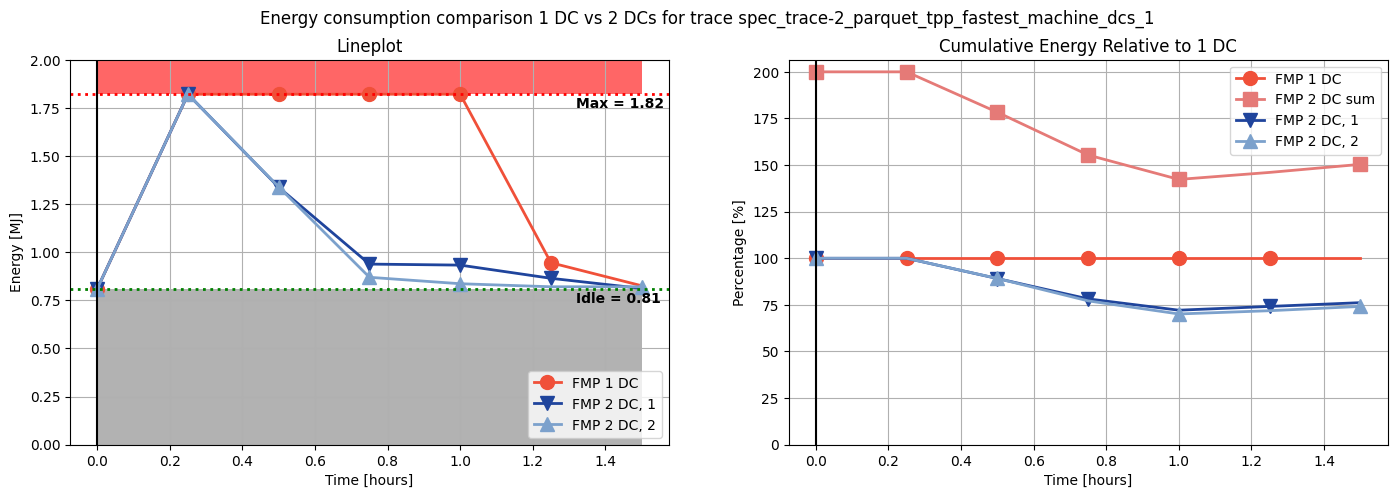

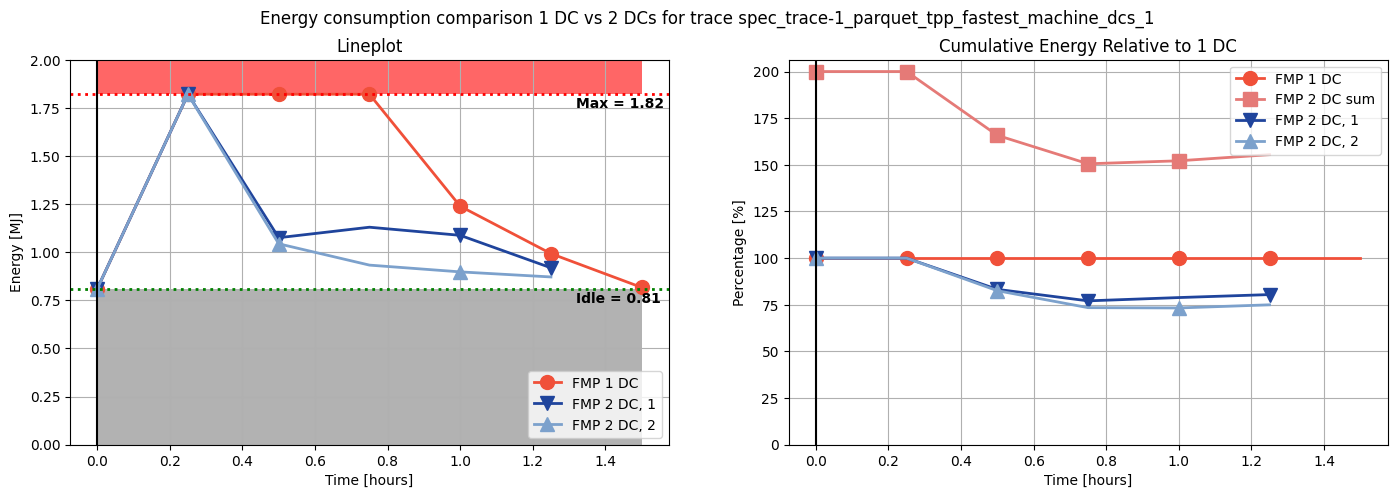

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


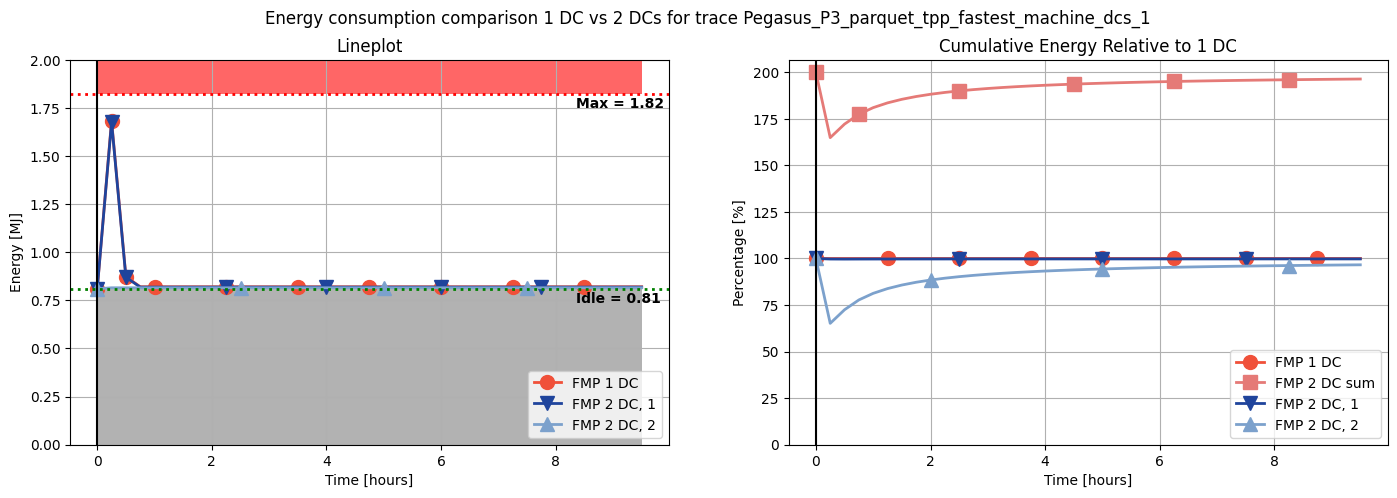

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


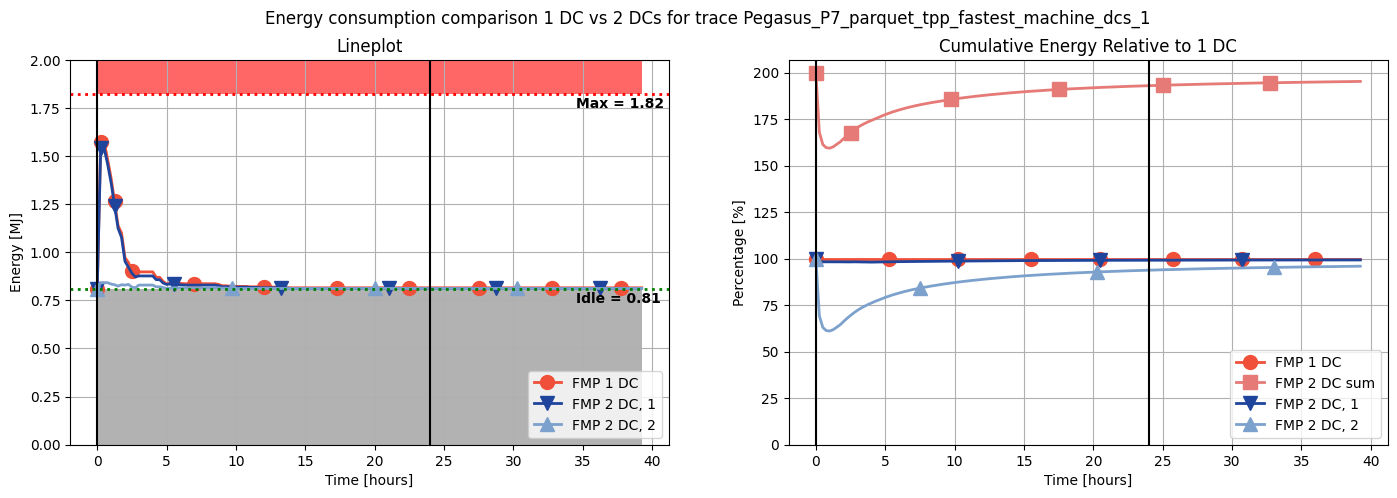

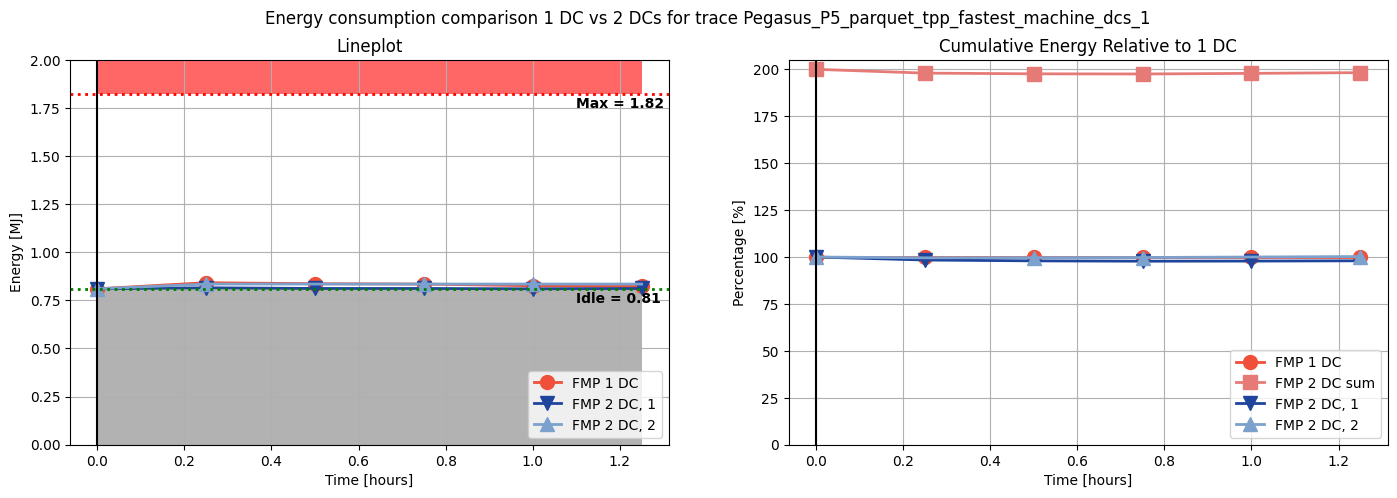

In [26]:
plot_vs_graphs(utilization_candidates_fmp, theoretical_max, theoretical_min, MAX_NUM_OF_GRAPHS, 'FMP')

### Duration candidates

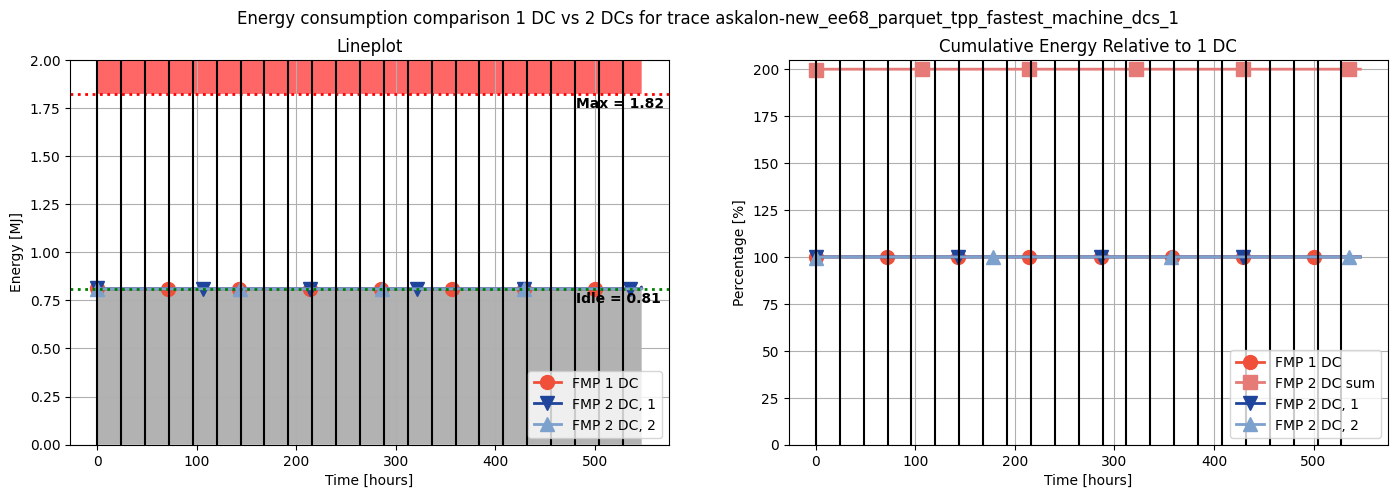

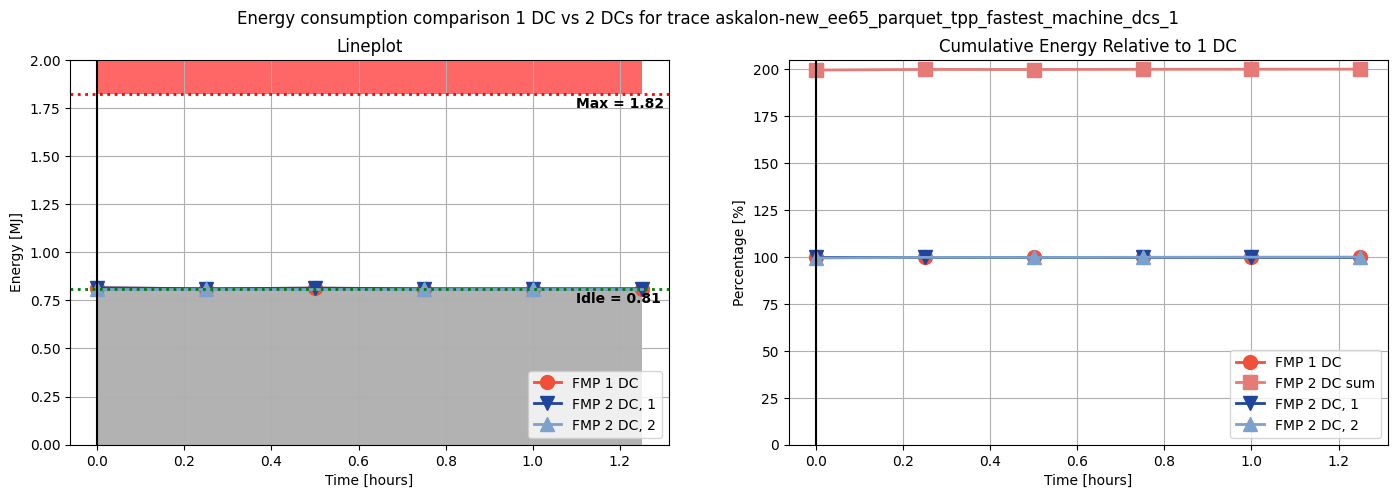

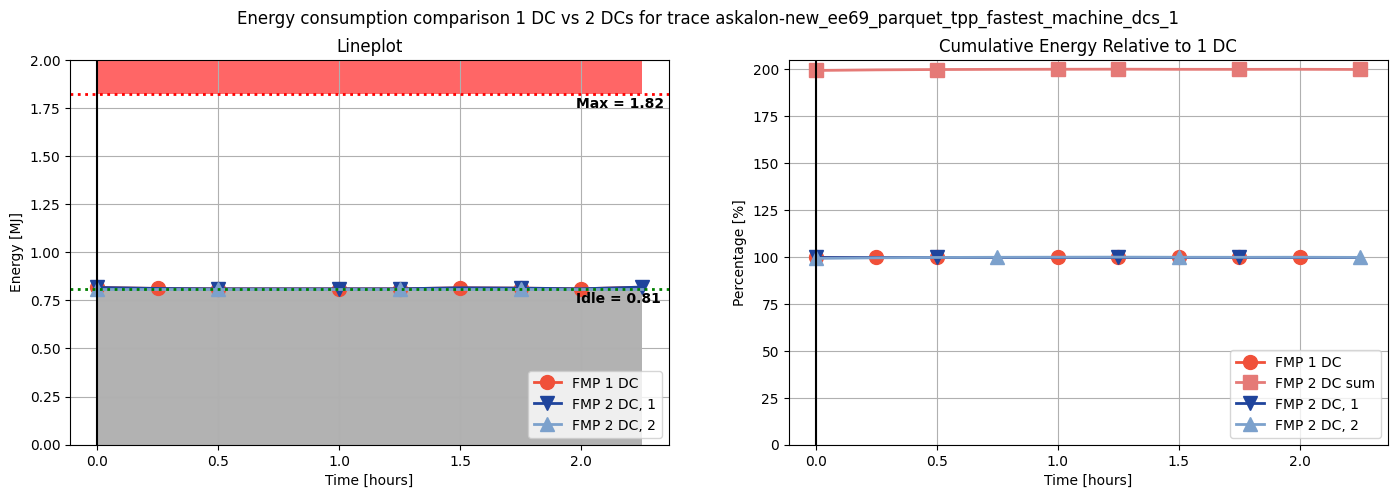

trace too short:  workflowhub_montage_dataset-02_degree-4-0_osg_schema-0-2_montage-4-0-osg-run009_parquet_tpp_fastest_machine_dcs_1   2


In [27]:
plot_vs_graphs(duration_candidates_fmp, theoretical_max, theoretical_min, MAX_NUM_OF_GRAPHS, 'FMP')

## 2.d)

In [64]:
lah_traces_util_2 = ['spec_trace-2_parquet_tpp_look_ahead_dcs_2', 
                      'spec_trace-1_parquet_tpp_look_ahead_dcs_2',
                      'Pegasus_P3_parquet_tpp_look_ahead_dcs_2', 
                      'Pegasus_P7_parquet_tpp_look_ahead_dcs_2', 
                      'Pegasus_P5_parquet_tpp_look_ahead_dcs_2']

lah_traces_dur_2 = ['askalon-new_ee68_parquet_tpp_look_ahead_dcs_2',
                  'askalon-new_ee65_parquet_tpp_look_ahead_dcs_2',
                  'askalon-new_ee69_parquet_tpp_look_ahead_dcs_2']
                  
wa = summary_dc2_df[summary_dc2_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(lah_traces_util_2)].to_latex(index=False))
wa = summary_dc2_df[summary_dc2_df['metric'] == 'Workflow Normalized Schedule Length'][['metric', 'trace_name', 'mean']]
print(wa[wa['trace_name'].isin(lah_traces_dur_2)].to_latex(index=False))

\begin{tabular}{llr}
\toprule
                             metric &                                trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length &   Pegasus\_P3\_parquet\_tpp\_look\_ahead\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P5\_parquet\_tpp\_look\_ahead\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length &   Pegasus\_P7\_parquet\_tpp\_look\_ahead\_dcs\_2 &  1.00 \\
Workflow Normalized Schedule Length & spec\_trace-1\_parquet\_tpp\_look\_ahead\_dcs\_2 &  3.31 \\
Workflow Normalized Schedule Length & spec\_trace-2\_parquet\_tpp\_look\_ahead\_dcs\_2 &  6.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
                             metric &                                    trace\_name &  mean \\
\midrule
Workflow Normalized Schedule Length & askalon-new\_ee65\_parquet\_tpp\_look\_ahead\_dcs\_2 &   1.0 \\
Workflow Normalized Schedule Length & askalon-new\_ee68\_parquet\_tpp\_look\_ahead\_dcs\_2 &   1.0 \\
Workflow Norm

C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\1788293513.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(lah_traces_util_2)].to_latex(index=False))
C:\Users\Radu\AppData\Local\Temp\ipykernel_11544\1788293513.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wa[wa['trace_name'].isin(lah_traces_dur_2)].to_latex(index=False))


### Utilization candidates

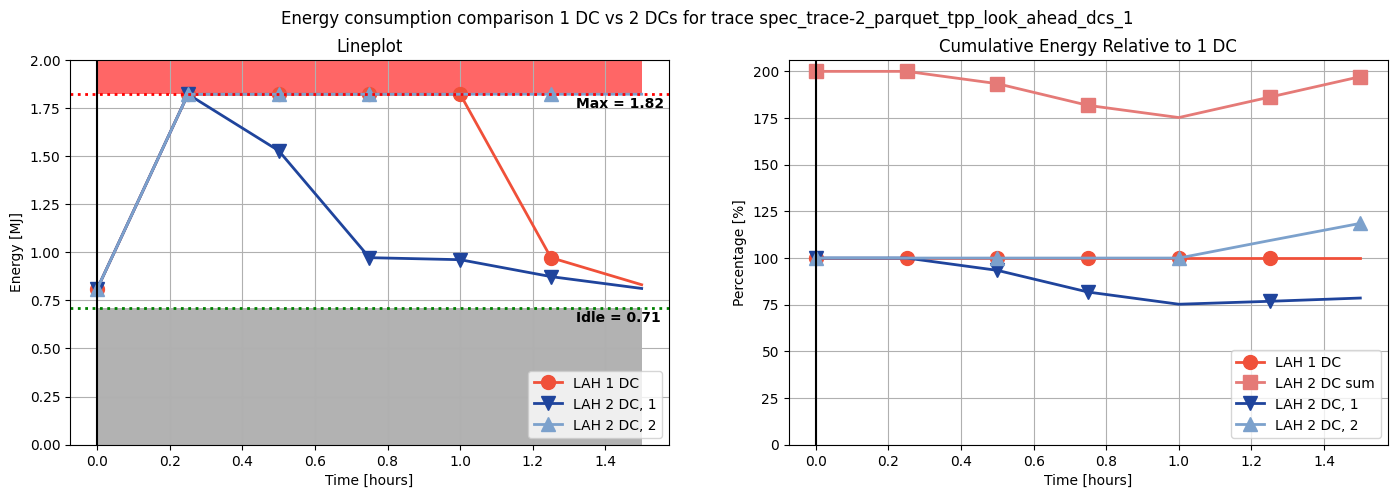

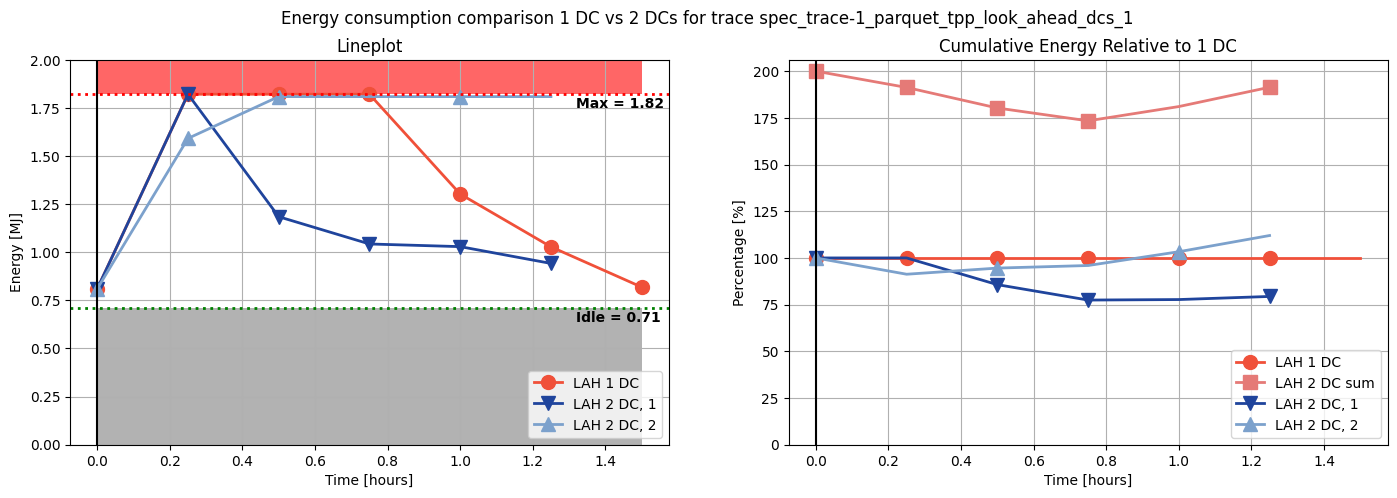

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_look_ahead_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_look_ahead_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_look_ahead_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_look_ahead_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_look_ahead_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_look_ahead_dcs_1   1


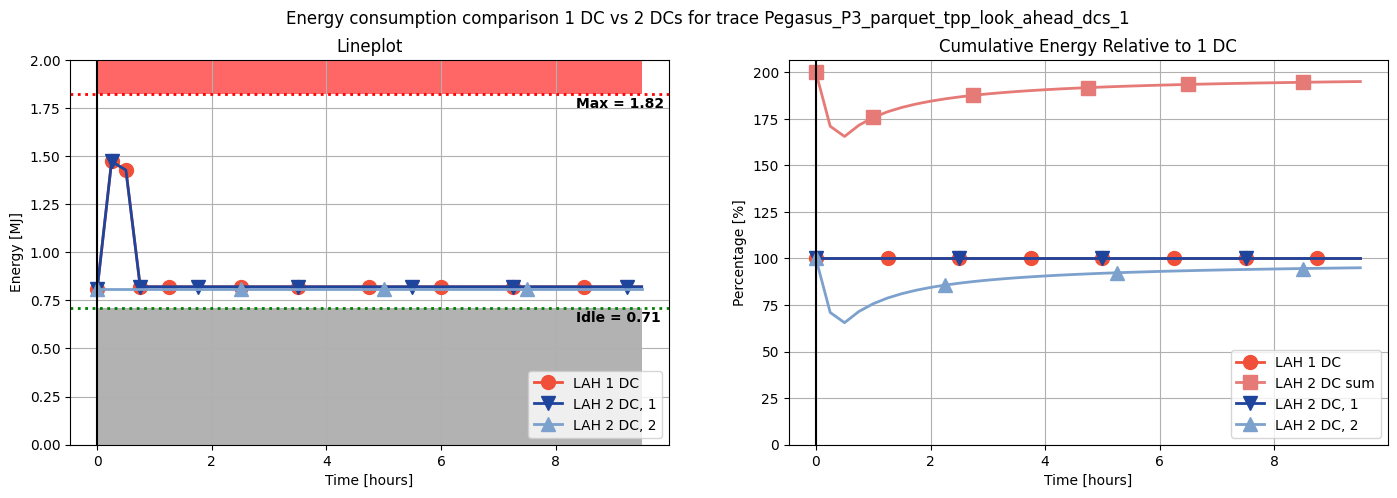

trace too short:  Pegasus_P6b_parquet_tpp_look_ahead_dcs_1   1


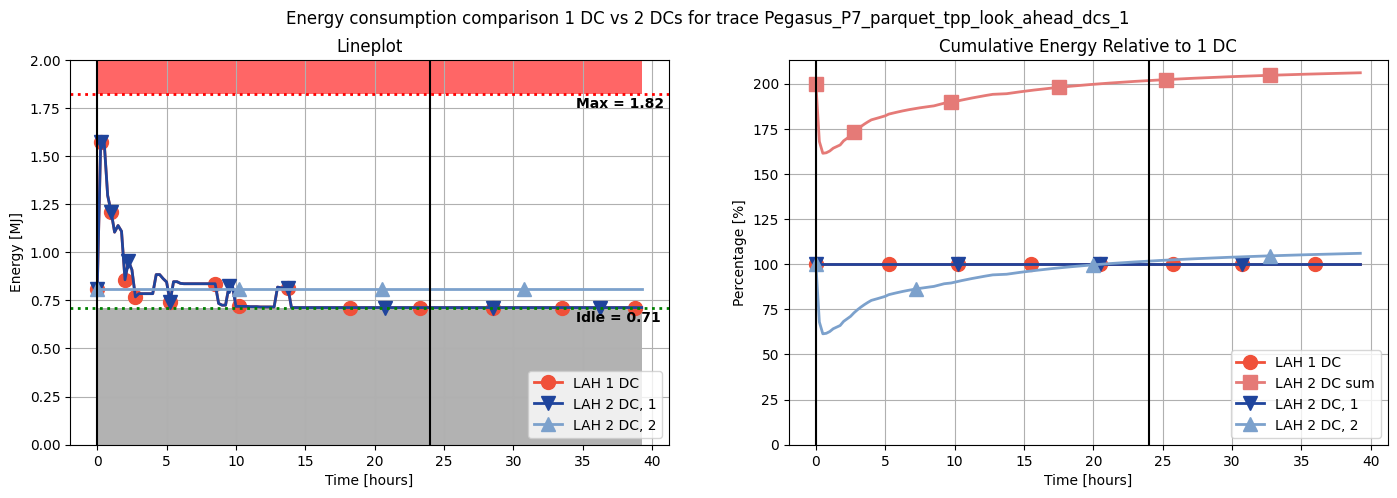

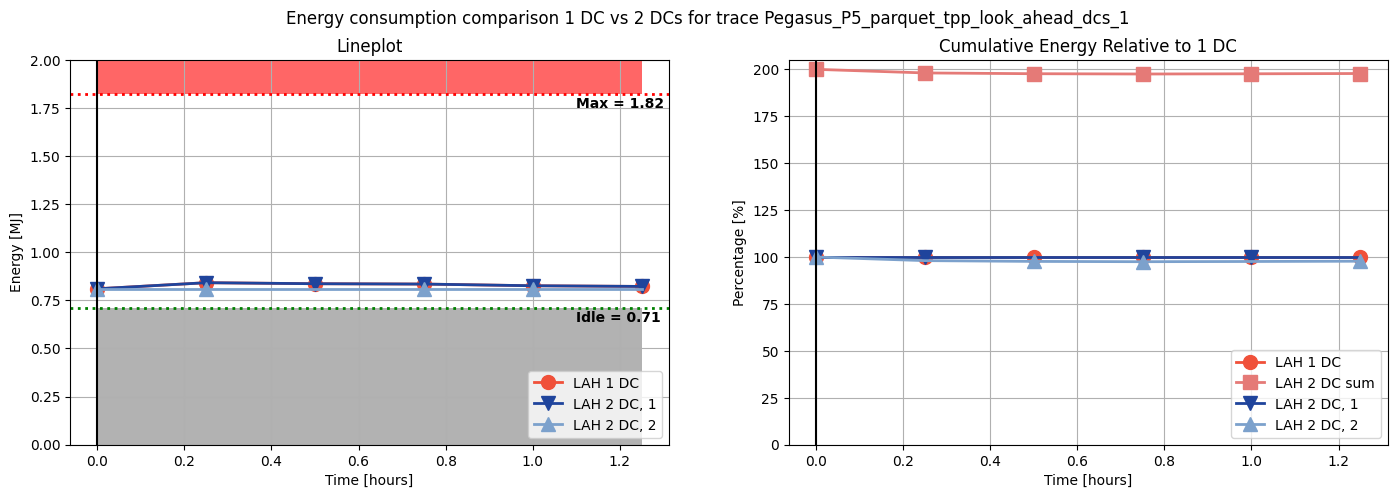

In [28]:
plot_vs_graphs(utilization_candidates_lah, theoretical_max, theoretical_min_dvfs, MAX_NUM_OF_GRAPHS, 'LAH')

### Duration candidates

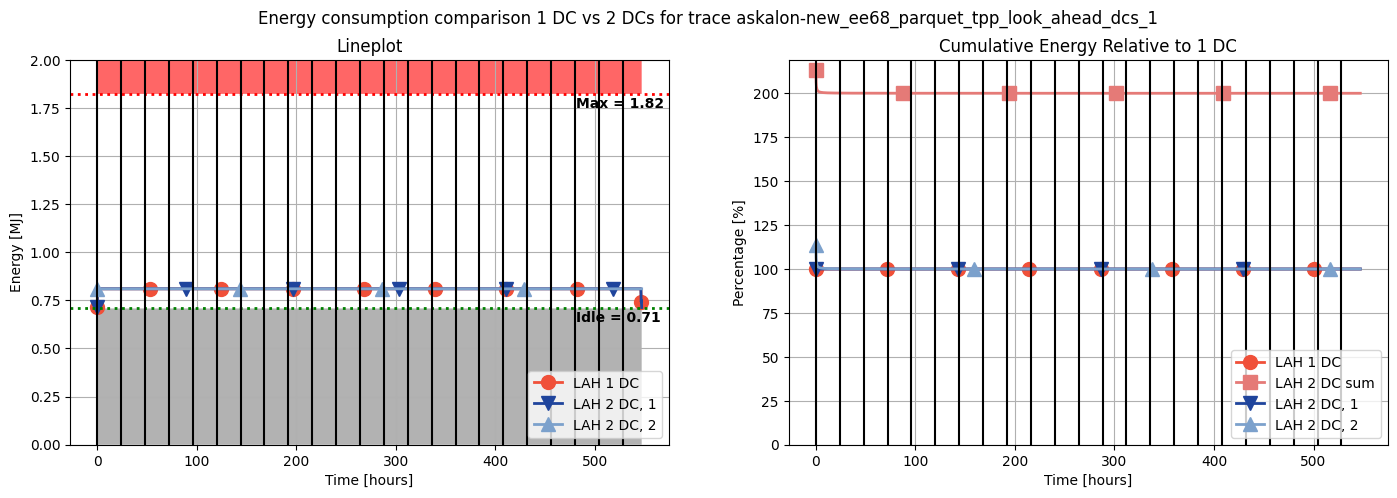

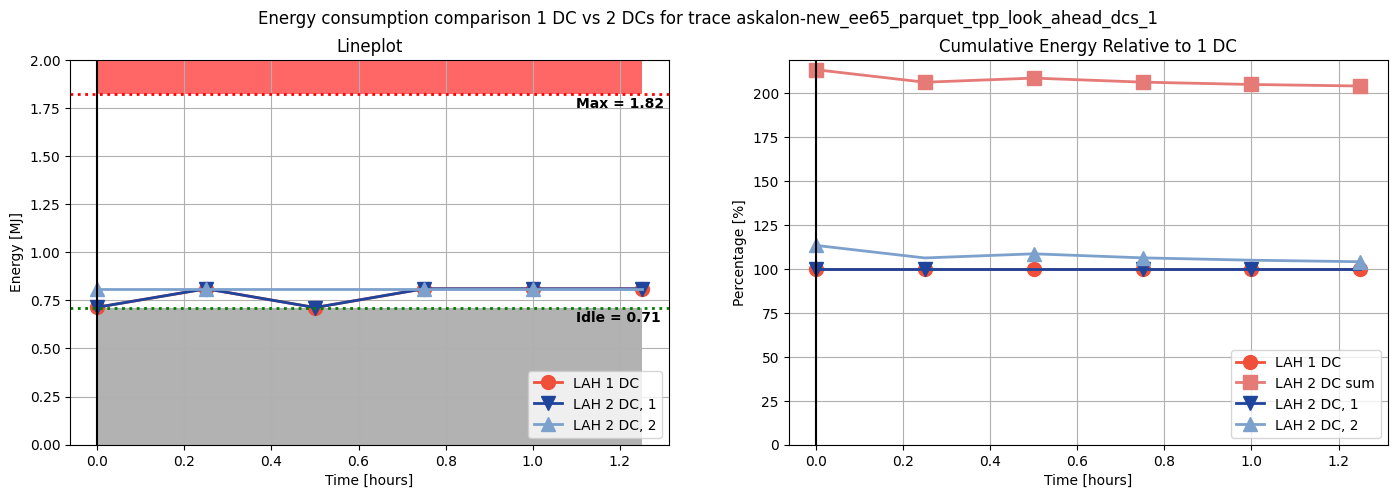

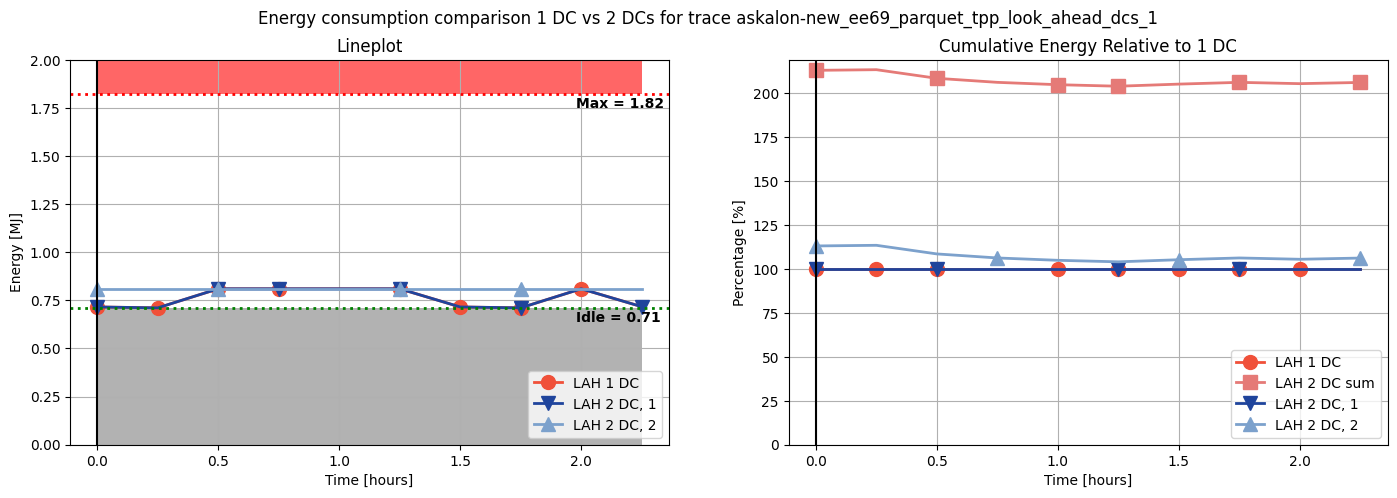

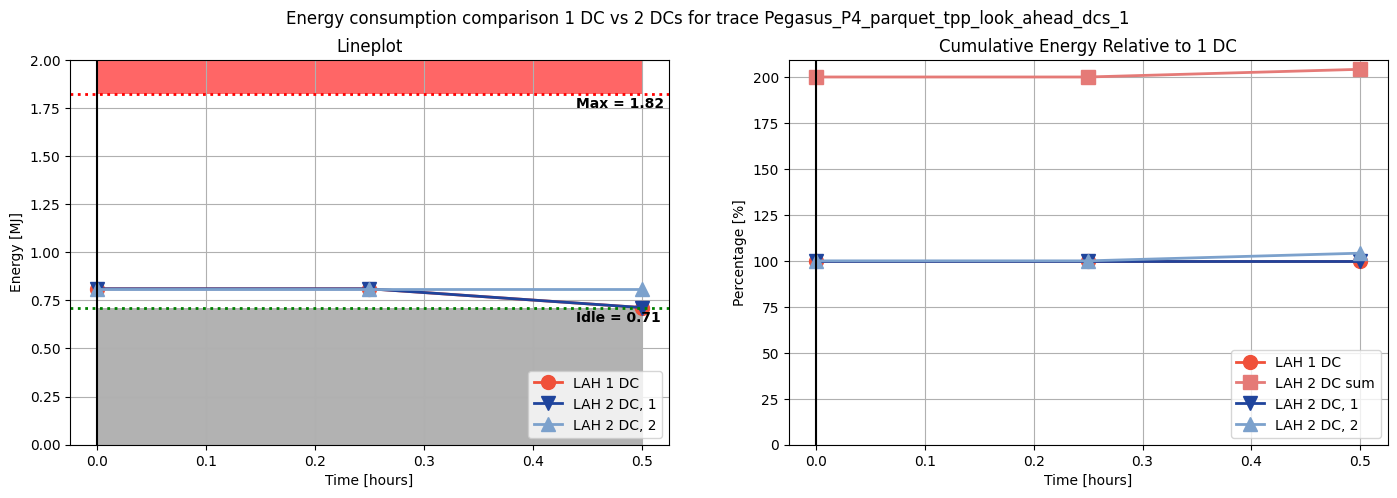

In [29]:
plot_vs_graphs(duration_candidates_lah, theoretical_max, theoretical_min_dvfs, MAX_NUM_OF_GRAPHS, 'LAH')

# Analysis

In [30]:
avg_res_10 = stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.05].trace_name.values
avg_res_10

array(['spec_trace-1_parquet_tpp_fastest_machine_dcs_1',
       'spec_trace-1_parquet_tpp_look_ahead_dcs_1',
       'spec_trace-2_parquet_tpp_fastest_machine_dcs_1',
       'spec_trace-2_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tp

In [31]:
wawa = create_dataframe(path_ex1, 'environment.csv')
wawa

,timestamp,host_id,it_power_total,trace_name
0,2930096,0-0,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
0,2930096,0-0,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
1,2930096,1-1,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
0,2930096,0-0,707940.0000,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
0,2930096,0-0,707940.0000,askalon-new_ee10_parquet_tpp_look_ahead_dcs_2
...,...,...,...,...
101,45000000,1-1,810000.0000,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
102,45900000,0-0,714085.3125,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
103,45900000,1-1,810000.0000,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
104,46800000,0-0,714085.3125,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


In [32]:
wawa[wawa['trace_name'] == 'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1']
# wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].plot(x='timestamp', y='it_power_total')

# line1 = plt.plot([1, 3, 5, 2, 5, 3, 1], c='red', lw=5)
# line2 = plt.plot([7, 2, 5, 7, 5, 2, 7], c='green', lw=5)
# plt.show()

# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].it_power_total, c='red', alpha=0.5)
# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].it_power_total, c='blue', alpha=0.5)
# plt.show()

,timestamp,host_id,it_power_total,trace_name
0,0,0-0,810000.0,workflowhub_epigenomics_dataset-hep_grid5000_s...


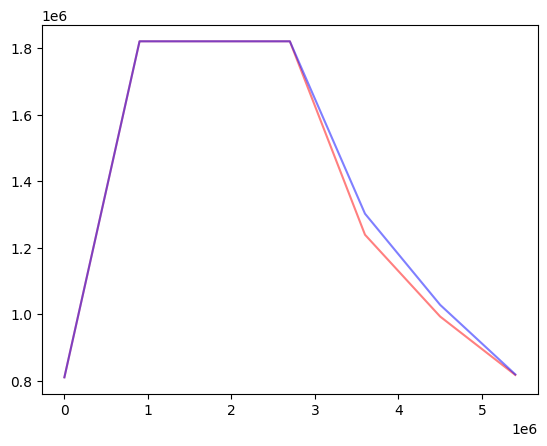

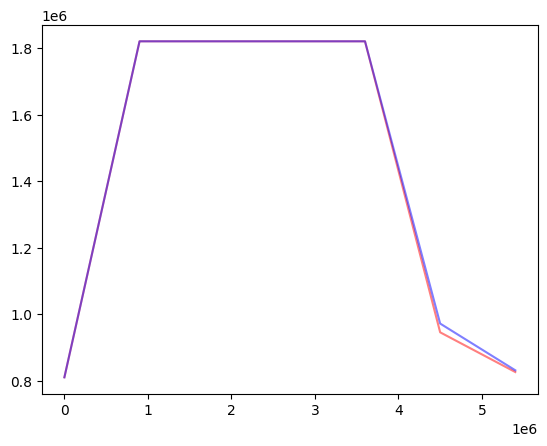

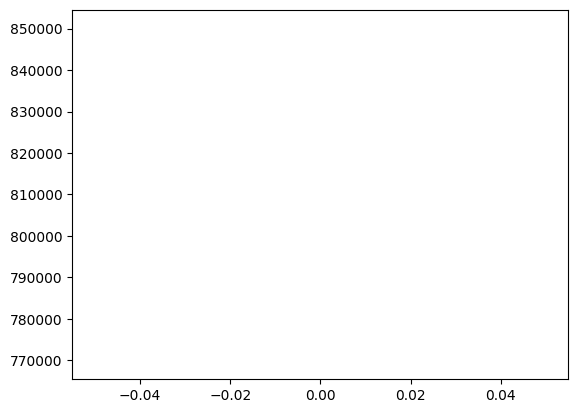

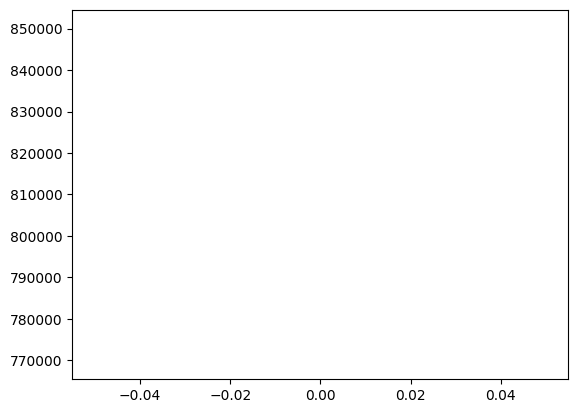

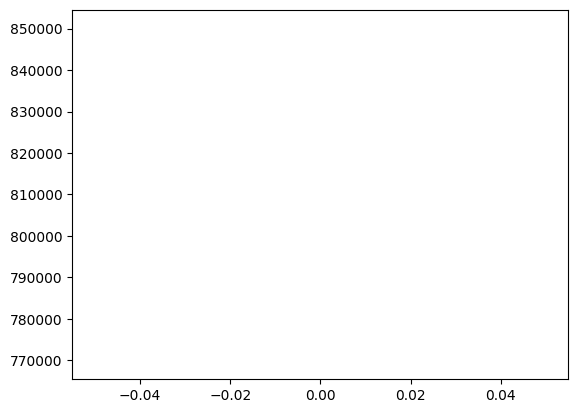

In [33]:
for i in range(0, len(avg_res_10)):
    if i % 2 == 1: continue
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='red')
    i += 1
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='blue')
    plt.show()